# The Sparks Foundation - Internship
### Data Science and Business Analytics

## Sidharth S N

Task 8: Time Analysis of Covid-19 dataset in you country/region.

***

Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

***

Importing the dataset

In [2]:
data = pd.read_csv('covid-data.csv')

In [3]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118815 entries, 0 to 118814
Data columns (total 63 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               118815 non-null  object 
 1   continent                              113390 non-null  object 
 2   location                               118815 non-null  object 
 3   date                                   118815 non-null  object 
 4   total_cases                            112893 non-null  float64
 5   new_cases                              112890 non-null  float64
 6   new_cases_smoothed                     111875 non-null  float64
 7   total_deaths                           102176 non-null  float64
 8   new_deaths                             102331 non-null  float64
 9   new_deaths_smoothed                    111875 non-null  float64
 10  total_cases_per_million                112298 non-null  

***

Visualizing the dataset

In [5]:
# Cases per continent
c_cases = data.groupby('continent')['total_cases'].sum()

Text(0.5, 1.0, 'Cases per continent')

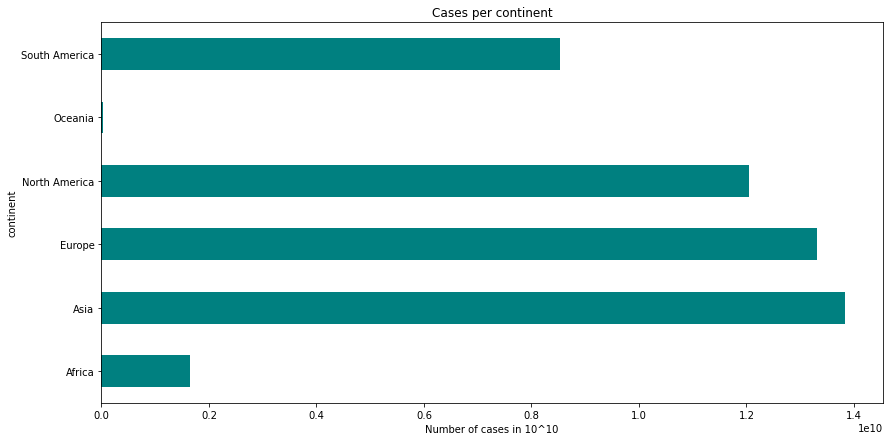

In [6]:
c_cases.plot(kind = 'barh', figsize = (14,7), color = 'teal')
plt.xlabel('Number of cases in 10^10')
plt.title('Cases per continent')

As we can see that 'Asia' has the majority of cases followed by 'Europe' and 'North America'.

In [7]:
# Deaths per continent
c_deaths = data.groupby('continent')['total_deaths'].sum()

Text(0.5, 1.0, 'Deaths per continent')

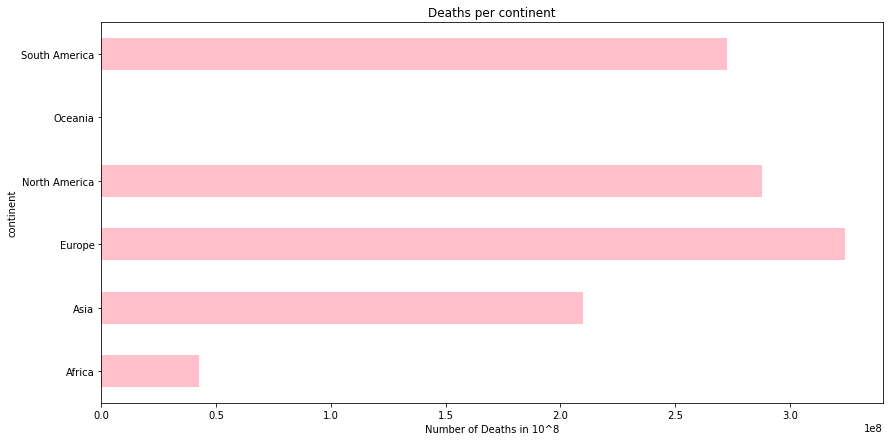

In [8]:
c_deaths.plot(kind = 'barh', figsize = (14,7), color = 'pink')
plt.xlabel('Number of Deaths in 10^8')
plt.title('Deaths per continent')

As we can see 'Europe' has the majority of deaths

***

Let's Closely observe the asian continent

In [9]:
data_asia = data[data['continent'] == 'Asia']
data_asia[:5]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN


Let's Visualize the Asian dataset

In [10]:
# Top 5 Countries with most Covid cases
ah_cases = data_asia.groupby('location')['total_cases'].sum().sort_values(ascending = False)[:5]

Text(0.5, 1.0, 'Cases in top 5 Country')

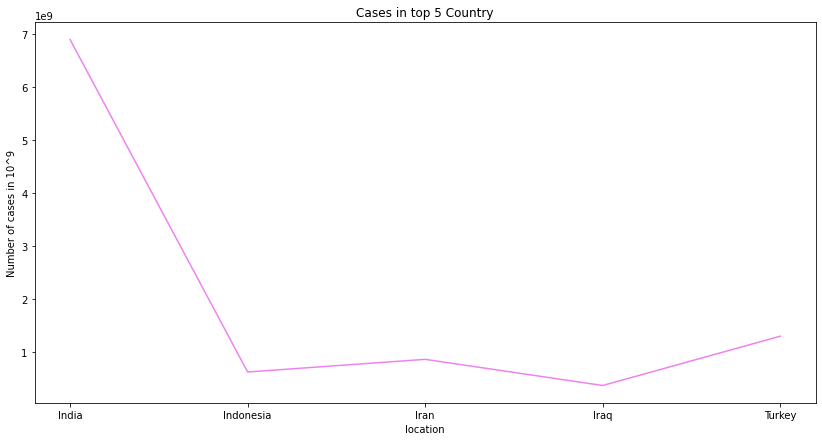

In [11]:
plt.figure(figsize=(14,7))
sns.lineplot(ah_cases.index, ah_cases, color = 'violet')
plt.ylabel('Number of cases in 10^9')
plt.title('Cases in top 5 Country')

As we can see 'India' has majority number of cases.

In [12]:
al_cases = data_asia.groupby('location')['total_cases'].sum().sort_values(ascending = False)[-5:]

Text(0.5, 1.0, 'Cases in top 5 Country')

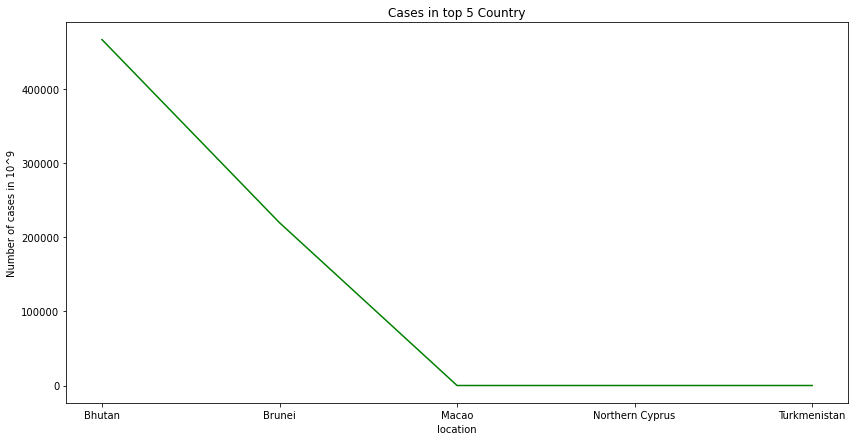

In [13]:
plt.figure(figsize=(14,7))
sns.lineplot(al_cases.index, al_cases, color = 'green')
plt.ylabel('Number of cases in 10^9')
plt.title('Cases in top 5 Country')

We can see that 'Turkmenistan' has least number of cases.

In [14]:
# Top 5 Countries with most Covid Deaths
ah_death = data_asia.groupby('location')['total_deaths'].sum().sort_values(ascending = False)[:5]

Text(0.5, 1.0, 'Deaths in top 5 Country')

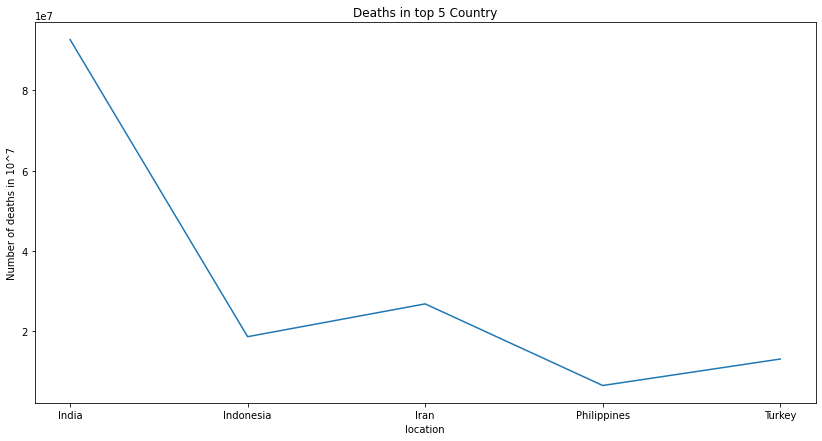

In [15]:
plt.figure(figsize=(14,7))
sns.lineplot(ah_death.index, ah_death)
plt.ylabel('Number of deaths in 10^7')
plt.title('Deaths in top 5 Country')

As we can see 'India' has the most deaths due to Covid-19.

In [16]:
al_death = data_asia.groupby('location')['total_deaths'].sum().sort_values(ascending = False)[-5:]

Text(0.5, 1.0, 'Deaths in top 5 Country')

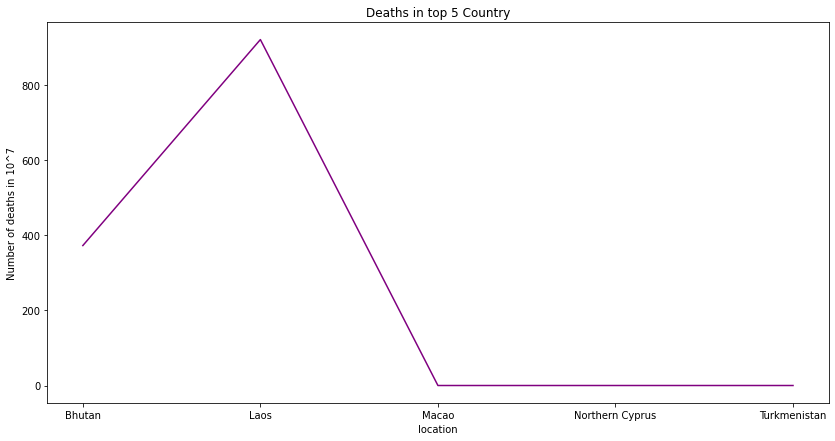

In [17]:
plt.figure(figsize=(14,7))
sns.lineplot(al_death.index, al_death, color = 'purple')
plt.ylabel('Number of deaths in 10^7')
plt.title('Deaths in top 5 Country')

We can see that 'Turkmenistan' has least number of deaths due to covid.

In [18]:
# New cases of covid
new_case = data_asia.groupby('location')['new_cases'].sum().sort_values(ascending = False)[:10]
new_case[:5]

location
India          33594803.0
Turkey          6137042.0
Iran            5493591.0
Indonesia       4201559.0
Philippines     2434753.0
Name: new_cases, dtype: float64

Text(0.5, 1.0, 'New cases in a country')

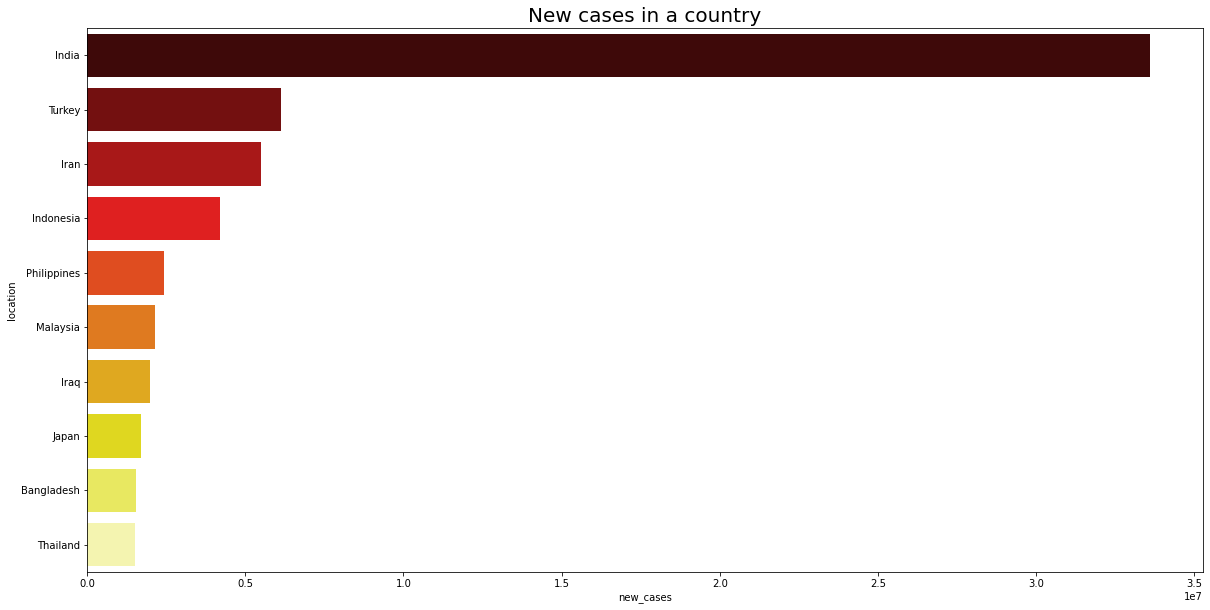

In [19]:
plt.figure(figsize=(20,10))
sns.barplot(new_case, new_case.index, palette = 'hot')
plt.title('New cases in a country', fontsize = 20)

We can see that 'India' has most number of new cases and 'Turkmenistan' with least.

In [20]:
# Total Cases per million
cases_pm = data_asia.groupby('location')['total_cases_per_million'].sum().sort_values(ascending = False)[:10]
cases_pm[:5]

location
Bahrain     3.726835e+07
Israel      2.994499e+07
Qatar       2.705471e+07
Maldives    2.658917e+07
Georgia     2.586671e+07
Name: total_cases_per_million, dtype: float64

Text(0.5, 0, 'Countries')

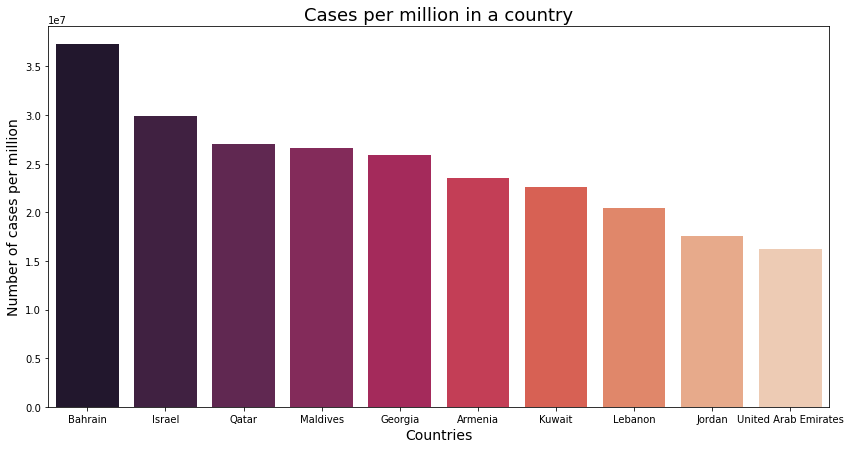

In [21]:
plt.figure(figsize=(14,7))
sns.barplot(cases_pm.index, cases_pm, palette = 'rocket')
plt.title('Cases per million in a country', fontsize = 18)
plt.ylabel('Number of cases per million', fontsize = 14)
plt.xlabel('Countries', fontsize = 14)

We can see that 'Bahrain' has most numbers.

In [22]:
# Total Deaths per million
deaths_pm = data_asia.groupby('location')['total_deaths_per_million'].sum().sort_values(ascending = False)[:10]
deaths_pm[:5]

location
Armenia    443706.601
Georgia    340533.500
Iran       314685.265
Lebanon    264539.523
Israel     222673.357
Name: total_deaths_per_million, dtype: float64

Text(0.5, 0, 'Countries')

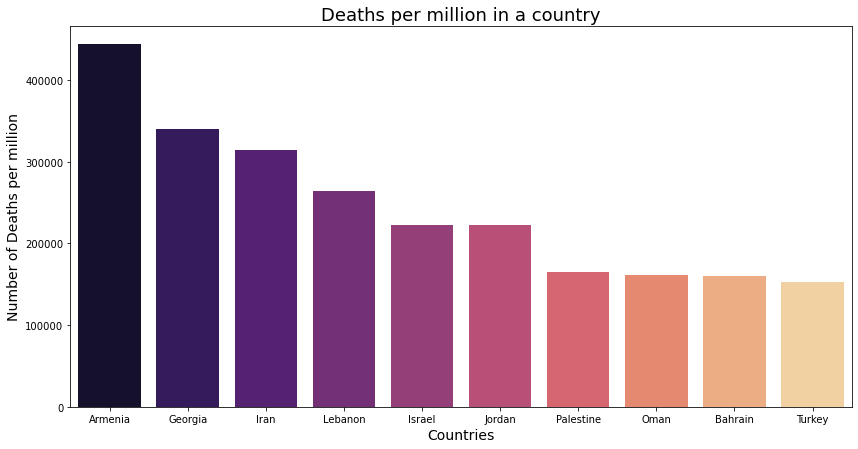

In [23]:
plt.figure(figsize=(14,7))
sns.barplot(deaths_pm.index, deaths_pm, palette = 'magma')
plt.title('Deaths per million in a country', fontsize = 18)
plt.ylabel('Number of Deaths per million', fontsize = 14)
plt.xlabel('Countries', fontsize = 14)

We can see that 'Armenia' is the country with most deaths per million

In [24]:
# ICU Patients
icu_p = data_asia.groupby('location')['icu_patients'].sum().sort_values(ascending = False)[:5]

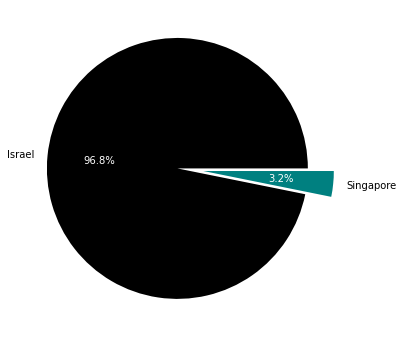

In [25]:
plt.figure(figsize = (6,6))
_,_,text = plt.pie(icu_p[:2], labels = icu_p.index[:2], autopct = '%1.1f%%', colors = ['black', 'teal'], explode = (0.1, 0.1))
for t in text:
    t.set_color('white')
plt.show()

We ca see that 'Israel' has most ICU patients and followed by 'Singapore'

In [26]:
# Total tests for covid
t_test = data_asia.groupby('location')['total_tests'].sum().sort_values(ascending = False)[:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

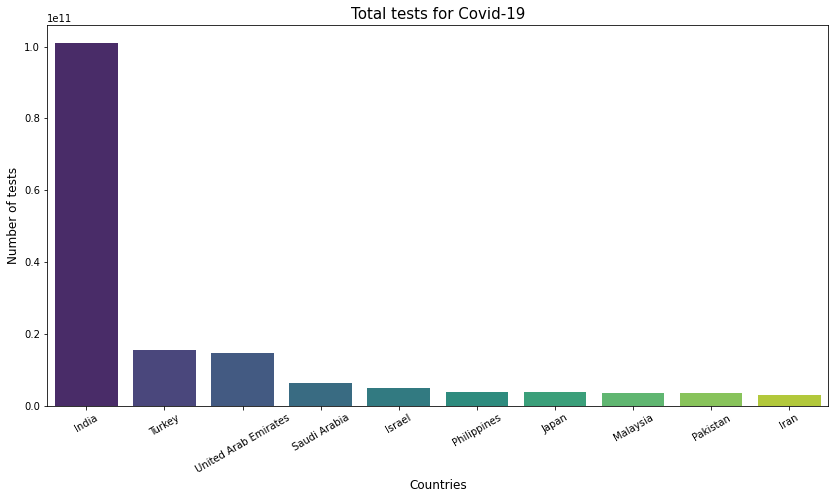

In [27]:
plt.figure(figsize=(14,7))
sns.barplot(t_test.index, t_test, palette = 'viridis')
plt.title('Total tests for Covid-19', fontsize = 15)
plt.ylabel('Number of tests', fontsize = 12)
plt.xlabel('Countries', fontsize = 12)
plt.xticks(rotation=30)

'India' has done the most number of tests of covid-19

In [28]:
# Positive rates of covid
positive_rate = data_asia.groupby('location')['positive_rate'].sum().sort_values(ascending = False)[:5]

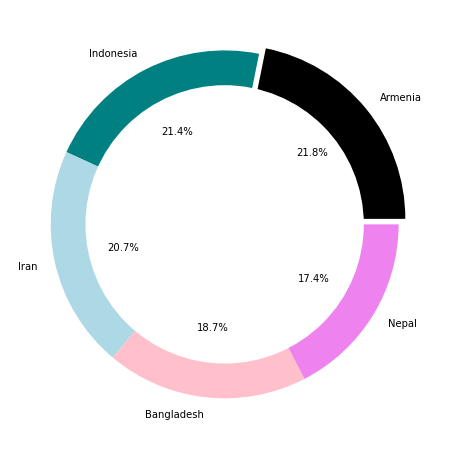

In [29]:
plt.figure(figsize = (8,8))
plt.pie(positive_rate, labels = positive_rate.index, autopct = '%1.1f%%', 
                   colors = ['black', 'teal', 'lightblue', 'pink', 'violet'], explode = (0.05, 0, 0, 0, 0))
fig = plt.gcf()
fig.gca().add_artist(plt.Circle((0,0), 0.8, fc = 'white'))

In [30]:
# Total vaccines
t_vaccine = data_asia.groupby('location')['total_vaccinations'].sum().sort_values(ascending = False)[:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

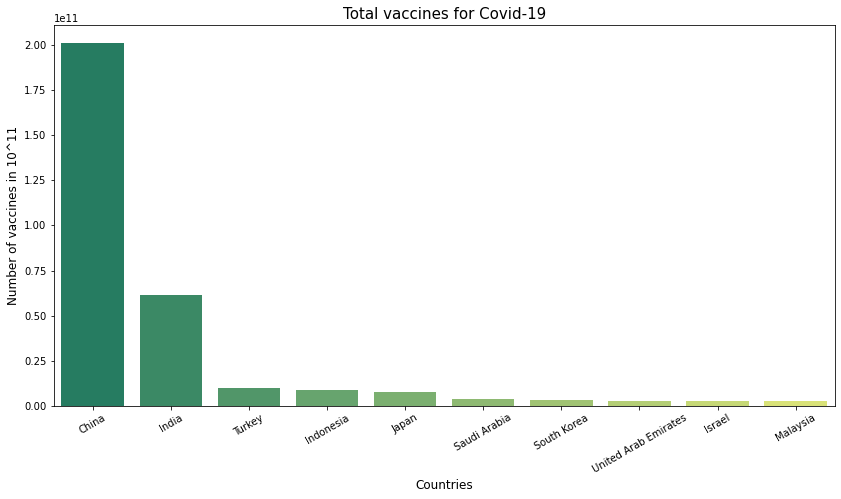

In [31]:
plt.figure(figsize=(14,7))
sns.barplot(t_vaccine.index, t_vaccine, palette = 'summer')
plt.title('Total vaccines for Covid-19', fontsize = 15)
plt.ylabel('Number of vaccines in 10^11', fontsize = 12)
plt.xlabel('Countries', fontsize = 12)
plt.xticks(rotation=30)

This plot shows that 'China' has most vaccines

In [32]:
# Total people vaccinated
people_vaccinated = data_asia.groupby('location')['people_vaccinated'].sum().sort_values(ascending = False)[:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

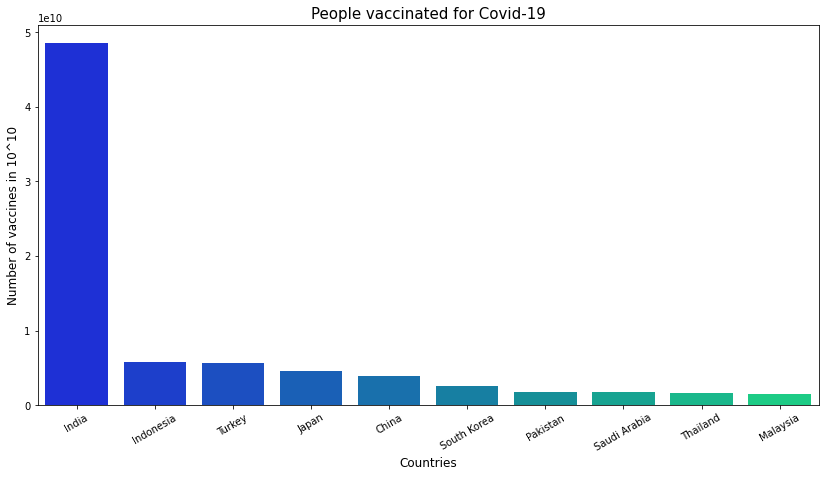

In [33]:
plt.figure(figsize=(14,7))
sns.barplot(people_vaccinated.index, people_vaccinated, palette = 'winter')
plt.title('People vaccinated for Covid-19', fontsize = 15)
plt.ylabel('Number of vaccines in 10^10', fontsize = 12)
plt.xlabel('Countries', fontsize = 12)
plt.xticks(rotation=30)

As we can see that 'India' has got most number of vaccines done

In [34]:
# Population density
population_den = data_asia.groupby('location')['population_density'].sum().sort_values(ascending = False)[:5]

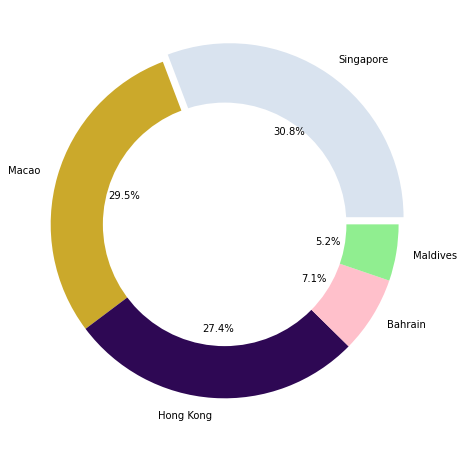

In [35]:
plt.figure(figsize = (8,8))
plt.pie(population_den, labels = population_den.index, autopct = '%1.1f%%', 
                   colors = ['#d9e3ef', '#cba92b', '#2e0854', 'pink', 'lightgreen'], explode = (0.05, 0, 0, 0, 0))
fig = plt.gcf()
fig.gca().add_artist(plt.Circle((0,0), 0.7, fc = 'white'))

As we can see that 'Singapore' has the maximum population density.

In [36]:
# Aged above 70
old_people = data_asia.groupby('location')['aged_70_older'].sum().sort_values(ascending = False)[:5]

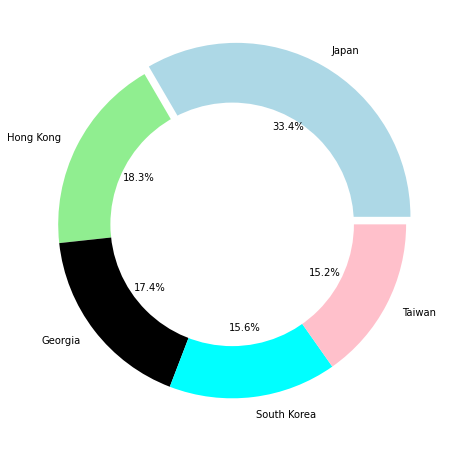

In [37]:
plt.figure(figsize = (8,8))
plt.pie(old_people, labels = old_people.index, autopct = '%1.1f%%', 
                   colors = ['lightblue', 'lightgreen', 'black', 'cyan', 'pink'], explode = (0.05, 0, 0, 0, 0))
fig = plt.gcf()
fig.gca().add_artist(plt.Circle((0,0), 0.7, fc = 'white'))

We can see that in 'Japan'  33.4% of people are above 70.

In [38]:
# GDP per capita
gdp = data_asia.groupby('location')['gdp_per_capita'].sum().sort_values(ascending = False)[:5]

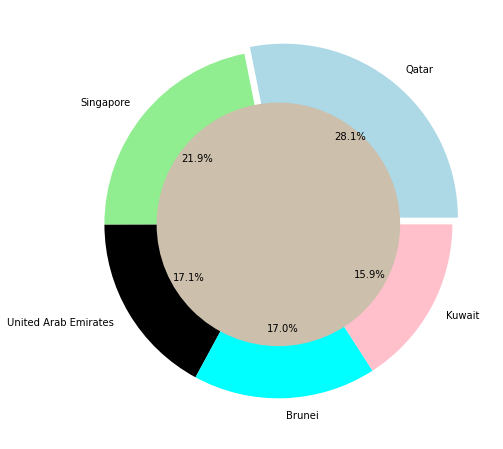

In [39]:
plt.figure(figsize = (8,8))
plt.pie(gdp, labels = gdp.index, autopct = '%1.1f%%', 
        colors = ['lightblue', 'lightgreen', 'black', 'cyan', 'pink'], explode = (0.05, 0, 0, 0, 0))
fig = plt.gcf()
fig.gca().add_artist(plt.Circle((0,0), 0.7, fc = '#ccbfac'))

We can see that 'Qatar' has the maximum GDP per capita.

Text(0.5, 1.0, 'People above 70 vs Total Deaths')

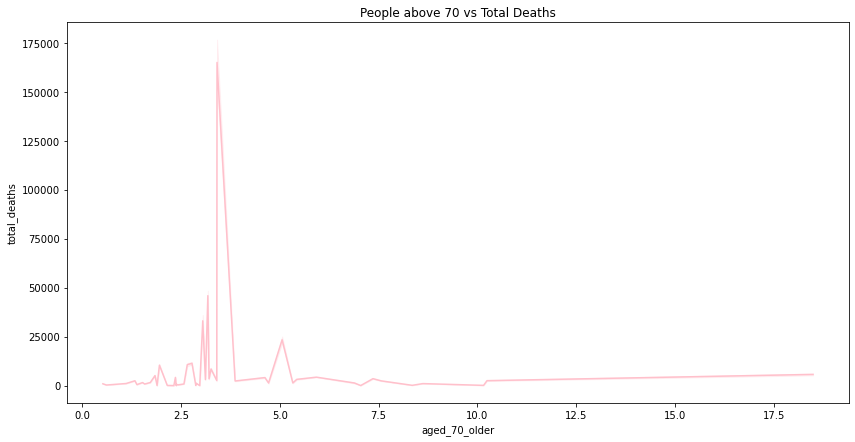

In [40]:
# People above 70 who have died
plt.figure(figsize = (14,7))
sns.lineplot(x = 'aged_70_older', y = 'total_deaths', data = data_asia, color = 'pink')
plt.title("People above 70 vs Total Deaths")

Text(0.5, 1.0, 'Female smokers vs Total Deaths')

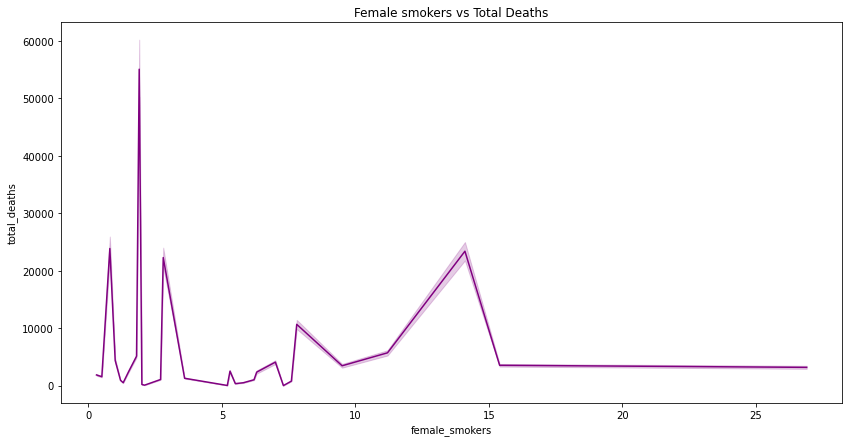

In [41]:
# Female smokers who have dies
plt.figure(figsize = (14,7))
sns.lineplot(x = 'female_smokers', y = 'total_deaths', data = data_asia, color = 'purple')
plt.title("Female smokers vs Total Deaths")

Text(0.5, 1.0, 'Male smokers vs Total Deaths')

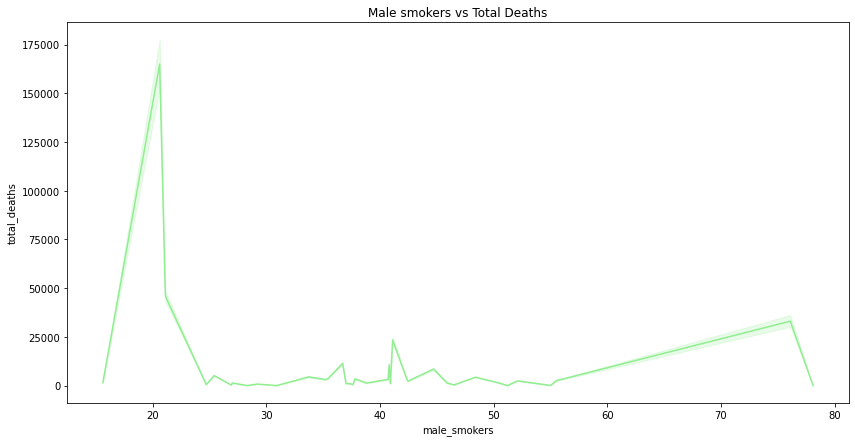

In [42]:
# Male smokers who have died
plt.figure(figsize = (14,7))
sns.lineplot(x = 'male_smokers', y = 'total_deaths', data = data_asia, color = 'lightgreen')
plt.title("Male smokers vs Total Deaths")

In [43]:
# Life expectancy
l = pd.DataFrame(data_asia.groupby('life_expectancy')['location'].value_counts()).sort_values(ascending = False,
                by = 'life_expectancy')[:5]

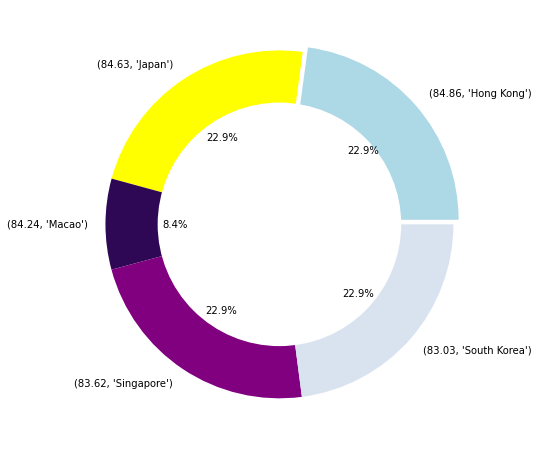

In [44]:
plt.figure(figsize = (8,8))
plt.pie(l, labels = l.index, autopct = '%1.1f%%', colors = ['lightblue', 'yellow', '#2e0854', 'purple', '#d9e3ef'],
        explode = (0.04, 0, 0, 0, 0))
fig = plt.gcf()
fig.gca().add_artist(plt.Circle((0,0), 0.7, fc = 'white'))
plt.show()

We can see that 'Hong Kong'(84.86) is with highest life expectancy followed by 'Japan'(84.63).

Text(0.5, 1.0, 'Total Tests vs Positive Rate')

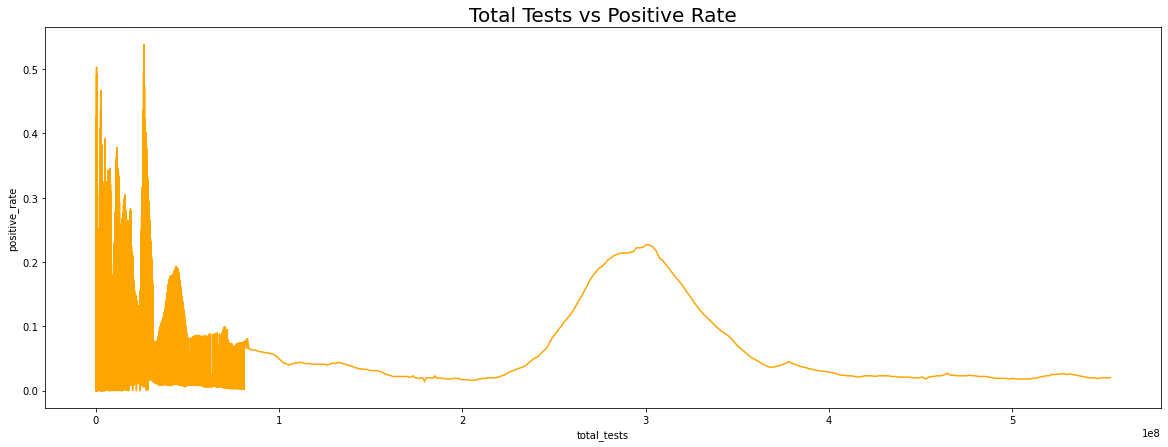

In [45]:
# Test of covid vs Positive rates
plt.figure(figsize = (20,7))
sns.lineplot(x = 'total_tests', y = 'positive_rate', data = data_asia, color = 'orange')
plt.title("Total Tests vs Positive Rate", fontsize = 20)

Text(0.5, 1.0, 'Total Cases vs Total Deaths')

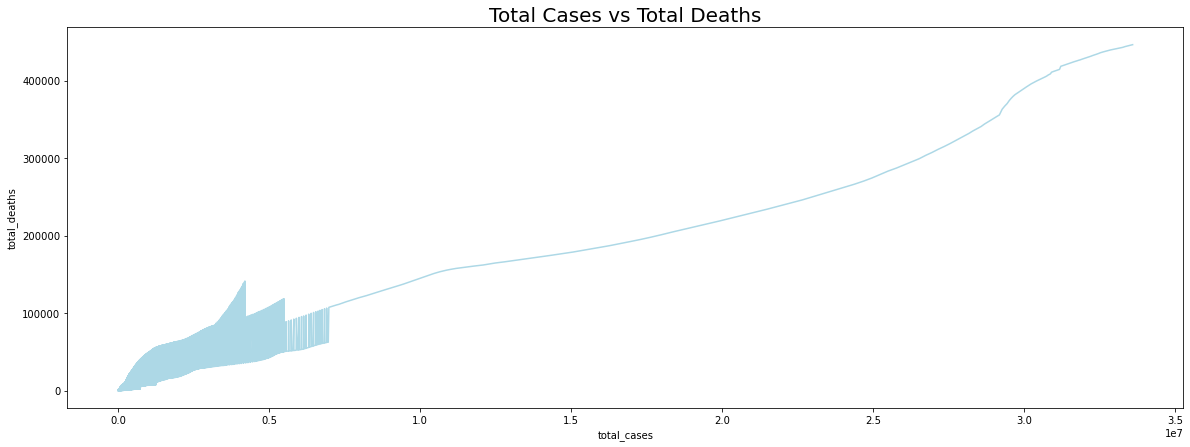

In [46]:
# Total cases vs total deaths
plt.figure(figsize = (20,7))
sns.lineplot(x = 'total_cases', y = 'total_deaths', data = data_asia, color = 'lightblue')
plt.title("Total Cases vs Total Deaths", fontsize = 20)

We can see that as the covid cases increases the deaths also starts to increase.

***

## Conclusion

Analysis results:

1. 'Asian' continent has most number of cases
2. 'Europe' has most number of deaths


3. 'India' has majority of covid cases and deaths in asia
4. 'Turkmenistan' has least number of cases and deaths in asia.


5. 'India' has done the most covid tests in asia
6. 'India' is the country in asia where most people got vaccinated.

***

Thank You:)